In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder , MinMaxScaler
from sklearn import model_selection
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor


import warnings
warnings.filterwarnings('ignore')

## Data Importation

In [69]:
data = pd.read_csv('global_airpolution.csv')
data.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [70]:
con = data['Country'].unique().tolist() 
print(con)

['Russian Federation', 'Brazil', 'Italy', 'Poland', 'France', 'United States of America', 'Germany', 'Belgium', 'Egypt', 'China', 'Netherlands', 'India', 'Pakistan', 'Republic of North Macedonia', 'Colombia', 'Romania', 'Indonesia', 'Finland', 'South Africa', 'United Kingdom of Great Britain and Northern Ireland', 'United Republic of Tanzania', 'Haiti', 'Somalia', 'Philippines', 'Latvia', 'Chad', 'New Zealand', 'Tunisia', 'Viet Nam', 'Iran (Islamic Republic of)', 'Mexico', 'Japan', 'El Salvador', 'Bulgaria', 'Nigeria', 'South Sudan', 'Guatemala', 'Ireland', 'Turkey', 'Peru', 'Democratic Republic of the Congo', 'Canada', 'Switzerland', 'Denmark', 'Cameroon', 'Australia', 'Portugal', "Côte d'Ivoire", 'Sweden', 'Ethiopia', 'Thailand', 'Hungary', 'Kazakhstan', 'Israel', 'Spain', 'Myanmar', 'Papua New Guinea', 'Madagascar', 'Lithuania', 'Ghana', 'Azerbaijan', 'Armenia', 'Ukraine', 'Malaysia', 'Serbia', 'Slovakia', 'Gambia', 'Ecuador', 'Bosnia and Herzegovina', 'Czechia', 'Argentina', 'Domin

# Exploration Data Analayis (EDA)

In [71]:
row, colum = data.shape
print('Row Count = {}\nColumns Count = {} '.format(row, colum))

Row Count = 23463
Columns Count = 12 


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


In [73]:
data['AQI Category'].unique()

array(['Moderate', 'Good', 'Unhealthy for Sensitive Groups', 'Unhealthy',
       'Very Unhealthy', 'Hazardous'], dtype=object)

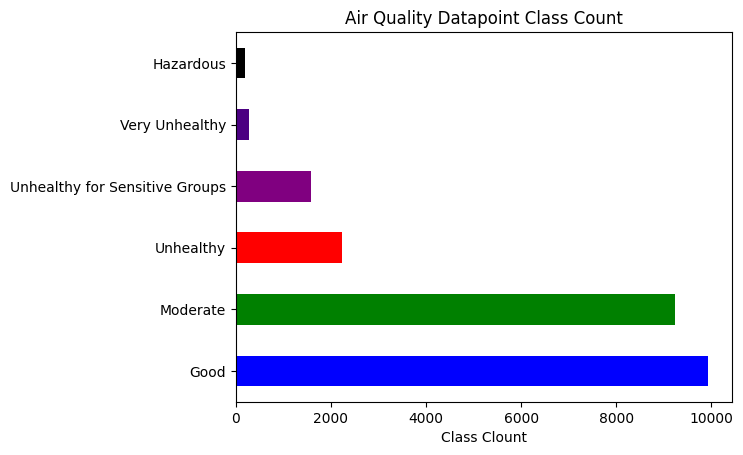

In [74]:
data['AQI Category'].value_counts().plot(kind='barh', color=['blue', 'green', 'red', 'purple', 'indigo', 'black'], title='Air Quality Datapoint Class Count')
plt.xlabel('Class Clount')
plt.show()

## AQI Concentration data exploration

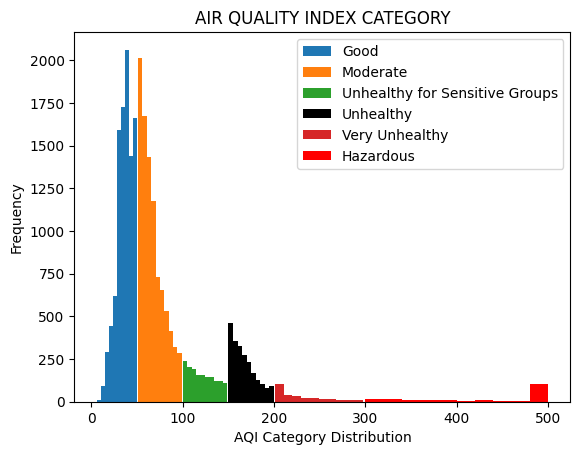

In [76]:
data['AQI Value'][data['AQI Category']=='Good'].plot(kind='hist', label='Good')
data['AQI Value'][data['AQI Category']=='Moderate'].plot(kind='hist', label='Moderate')
data['AQI Value'][data['AQI Category']=='Unhealthy for Sensitive Groups'].plot(kind='hist' , label='Unhealthy for Sensitive Groups')
data['AQI Value'][data['AQI Category']=='Unhealthy'].plot(kind='hist', label='Unhealthy', color='black')
data['AQI Value'][data['AQI Category']=='Very Unhealthy'].plot(kind='hist', label='Very Unhealthy')
data['AQI Value'][data['AQI Category']=='Hazardous'].plot(kind='hist', label='Hazardous', color='red')
plt.legend()
plt.title('AIR QUALITY INDEX CATEGORY')
plt.xlabel('AQI Category Distribution')
plt.show()

OZONE CONCENTRATION

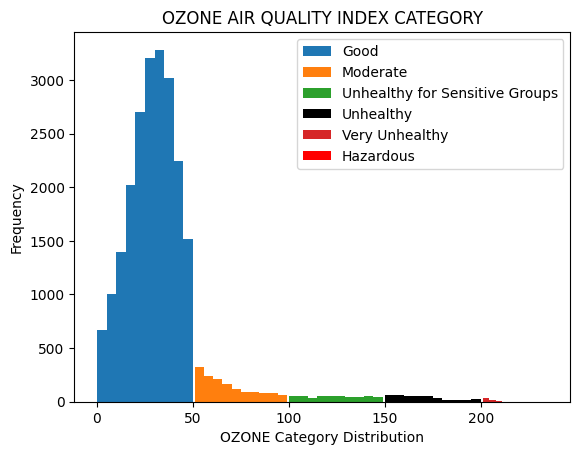

In [85]:
data['Ozone AQI Value'][data['Ozone AQI Category']=='Good'].plot(kind='hist', label='Good')
data['Ozone AQI Value'][data['Ozone AQI Category']=='Moderate'].plot(kind='hist', label='Moderate')
data['Ozone AQI Value'][data['Ozone AQI Category']=='Unhealthy for Sensitive Groups'].plot(kind='hist' , label='Unhealthy for Sensitive Groups')
data['Ozone AQI Value'][data['Ozone AQI Category']=='Unhealthy'].plot(kind='hist', label='Unhealthy', color='black')
data['Ozone AQI Value'][data['Ozone AQI Category']=='Very Unhealthy'].plot(kind='hist', label='Very Unhealthy')
data['Ozone AQI Value'][data['Ozone AQI Category']=='Hazardous'].plot(kind='hist', label='Hazardous', color='red')
plt.legend()
plt.title('OZONE AIR QUALITY INDEX CATEGORY')
plt.xlabel('OZONE Category Distribution')
plt.show()

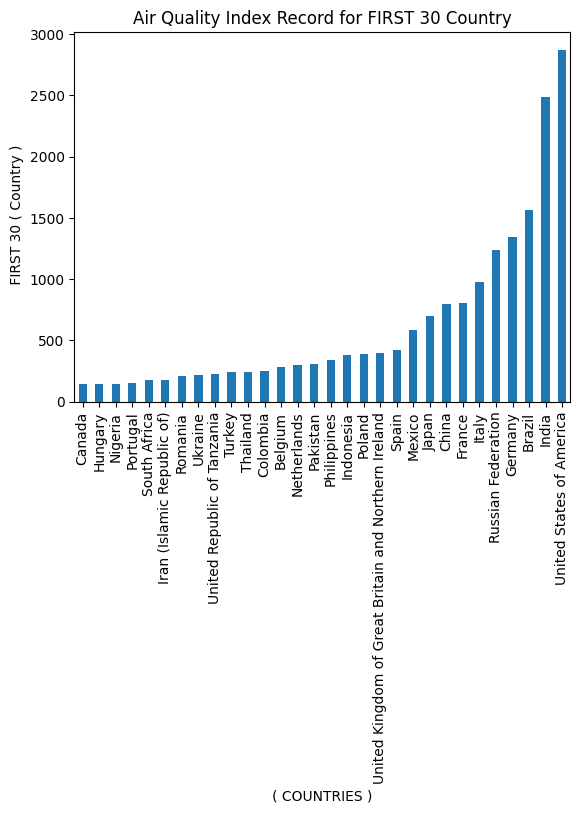

In [89]:
data['Country'].value_counts().sort_values()[-30:].plot(kind='bar')
plt.title('Air Quality Index Record for FIRST 30 Country')
plt.xlabel('( COUNTRIES )')
plt.ylabel(' FIRST 30 ( Country )')
plt.show()

### DATA CORELATION CHART

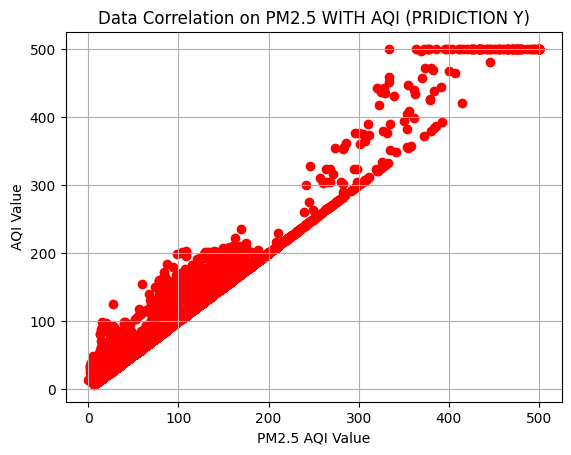

In [97]:
import matplotlib.pyplot as plt
aqi = data['AQI Value'].values
pm_val =  data['PM2.5 AQI Value'].values

plt.scatter(pm_val, aqi, color='red')
plt.title('Data Correlation on PM2.5 WITH AQI (PRIDICTION Y)')
plt.xlabel('PM2.5 AQI Value')
plt.ylabel("AQI Value")
plt.grid()

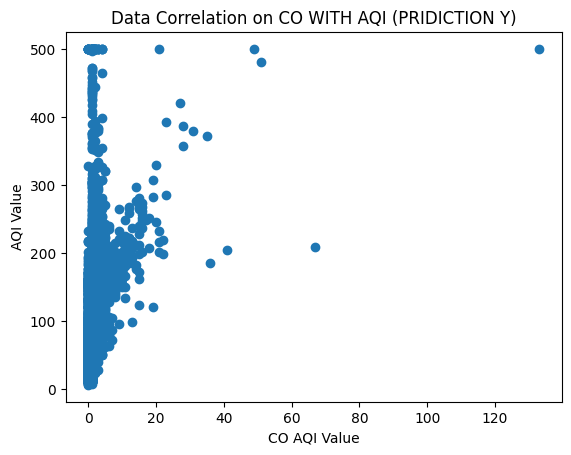

In [99]:
import matplotlib.pyplot as plt
aqi = data['AQI Value'].values
co_val =  data['CO AQI Value'].values

plt.scatter(co_val, aqi)
plt.title('Data Correlation on CO WITH AQI (PRIDICTION Y)')
plt.xlabel('CO AQI Value')
plt.ylabel("AQI Value")
plt.show()

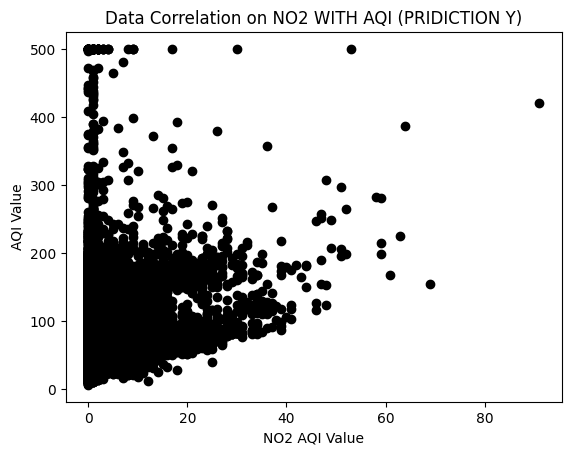

In [101]:
import matplotlib.pyplot as plt
aqi = data['AQI Value'].values
co_val =  data['NO2 AQI Value'].values

plt.scatter(co_val, aqi, color='black')
plt.title('Data Correlation on NO2 WITH AQI (PRIDICTION Y)')
plt.xlabel('NO2 AQI Value')
plt.ylabel("AQI Value")
plt.show()

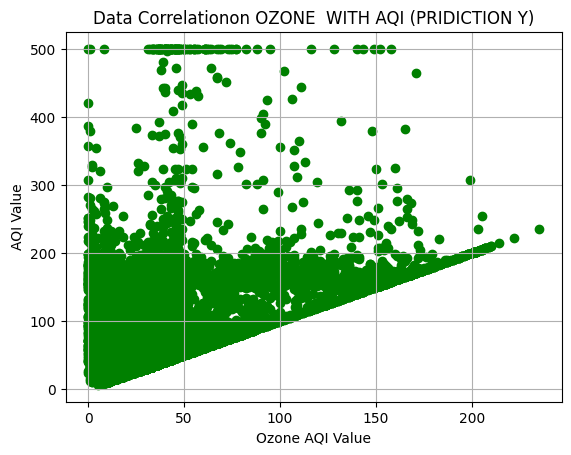

In [102]:
import matplotlib.pyplot as plt
aqi = data['AQI Value'].values
co_val =  data['Ozone AQI Value'].values

plt.scatter(co_val, aqi , color='green')
plt.title('Data Correlationon OZONE  WITH AQI (PRIDICTION Y)')
plt.xlabel('Ozone AQI Value')
plt.ylabel("AQI Value")
plt.grid()

In [4]:
data['AQI Category'].unique()

array(['Moderate', 'Good', 'Unhealthy for Sensitive Groups', 'Unhealthy',
       'Very Unhealthy', 'Hazardous'], dtype=object)

## Extracting Nigerial Air Quality Index Sample... 

In [5]:
nigeria_data_sample = data[data['Country'] == 'Nigeria']
general_data_sample = data[data['Country'] != 'Nigeria']

In [6]:
nigeria_data_sample.head(5)

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
115,Nigeria,Ilobu,133,Unhealthy for Sensitive Groups,4,Good,23,Good,3,Good,133,Unhealthy for Sensitive Groups
120,Nigeria,Iseyin,90,Moderate,3,Good,18,Good,2,Good,90,Moderate
188,Nigeria,Idanre,115,Unhealthy for Sensitive Groups,3,Good,24,Good,2,Good,115,Unhealthy for Sensitive Groups
240,Nigeria,Agbor,139,Unhealthy for Sensitive Groups,7,Good,13,Good,5,Good,139,Unhealthy for Sensitive Groups
390,Nigeria,Oyo,80,Moderate,2,Good,22,Good,1,Good,80,Moderate


In [7]:
nigeria_data_sample.shape

(144, 12)

## Exploring NIgerial Sample Data

In [8]:
naija_city = nigeria_data_sample.City.unique()
print(len(naija_city))
naija_city

144


array(['Ilobu', 'Iseyin', 'Idanre', 'Agbor', 'Oyo', 'Ikom', 'Inisa',
       'Kano', 'Lafiagi', 'Mubi', 'Nkpor', 'Ohafia', 'Okrika', 'Daura',
       'Enugu', 'Bauchi', 'Abuja', 'Apomu', 'Ode', 'Jos', 'Sapele',
       'Idah', 'Keffi', 'Uromi', 'Iwo', 'Jega', 'Numan', 'Asaba', 'Opobo',
       'Ekpoma', 'Lalupon', 'Oron', 'Lafia', 'Emure', 'Ughelli',
       'Damaturu', 'Dutse', 'Okitipupa', 'Ugep', 'Ikare', 'Bida',
       'Birnin Kebbi', 'Aba', 'Maiduguri', 'Jalingo', 'Ila', 'Katsina',
       'Oshogbo', 'Kafanchan', 'Gombe', 'Eruwa', 'Fiditi', 'Jimeta',
       'Kaduna', 'Igbo Ora', 'Ikirun', 'Abonnema', 'Biu', 'Lokoja',
       'Gusau', 'Potiskum', 'Ihiala', 'Ilesha', 'Nnewi', 'Nsukka', 'Ondo',
       'Olupona', 'Ilorin', 'Ankpa', 'Kumo', 'Sokoto', 'Bende', 'Benin',
       'Nguru', 'Oka', 'Funtua', 'Gashua', 'Eha Amufu', 'Owerri',
       'Shagamu', 'Igboho', 'Amaigbo', 'Ejigbo', 'Offa', 'Modakeke',
       'Malumfashi', 'Kaura Namoda', 'Bugama', 'Ikire', 'Ipoti', 'Effium',
       'Makurdi', 

In [9]:
val = nigeria_data_sample['AQI Value'].values

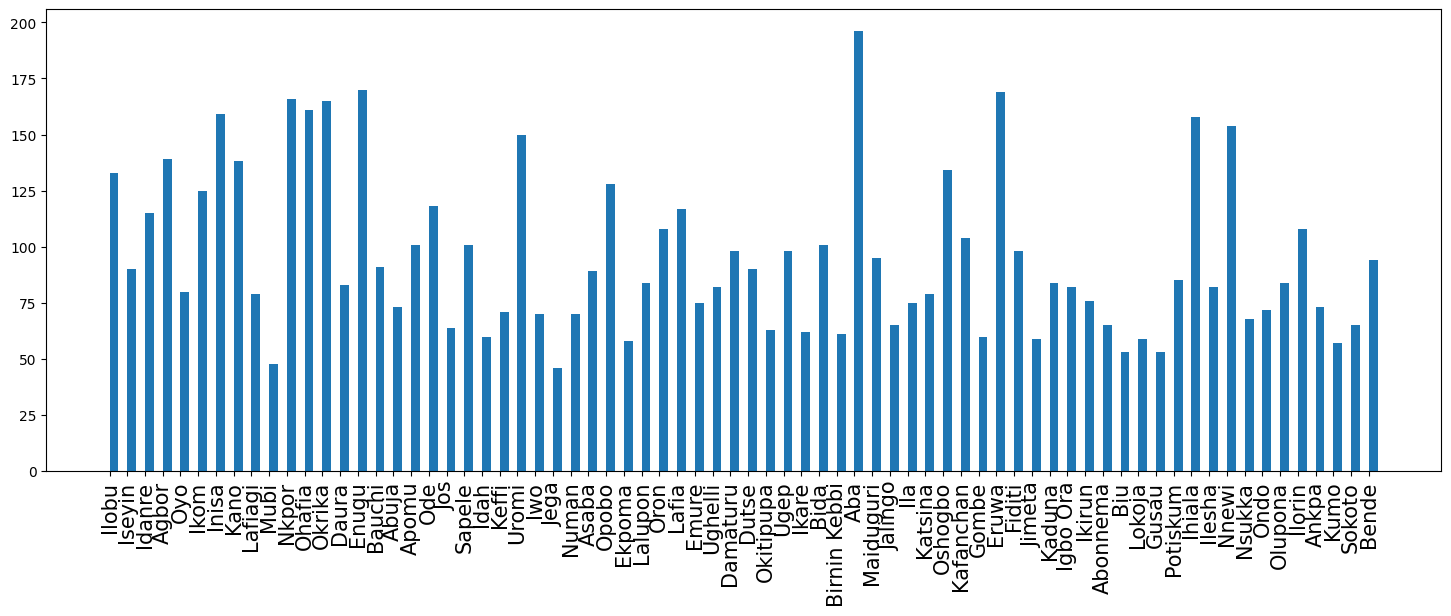

In [10]:
import seaborn as sn 
city = nigeria_data_sample.City.unique()
plt.figure(figsize=(18,6))
plt.bar(city[:72], val[:72], align='edge', width=0.5)
plt.xticks(rotation=90, fontsize=15)
plt.show()

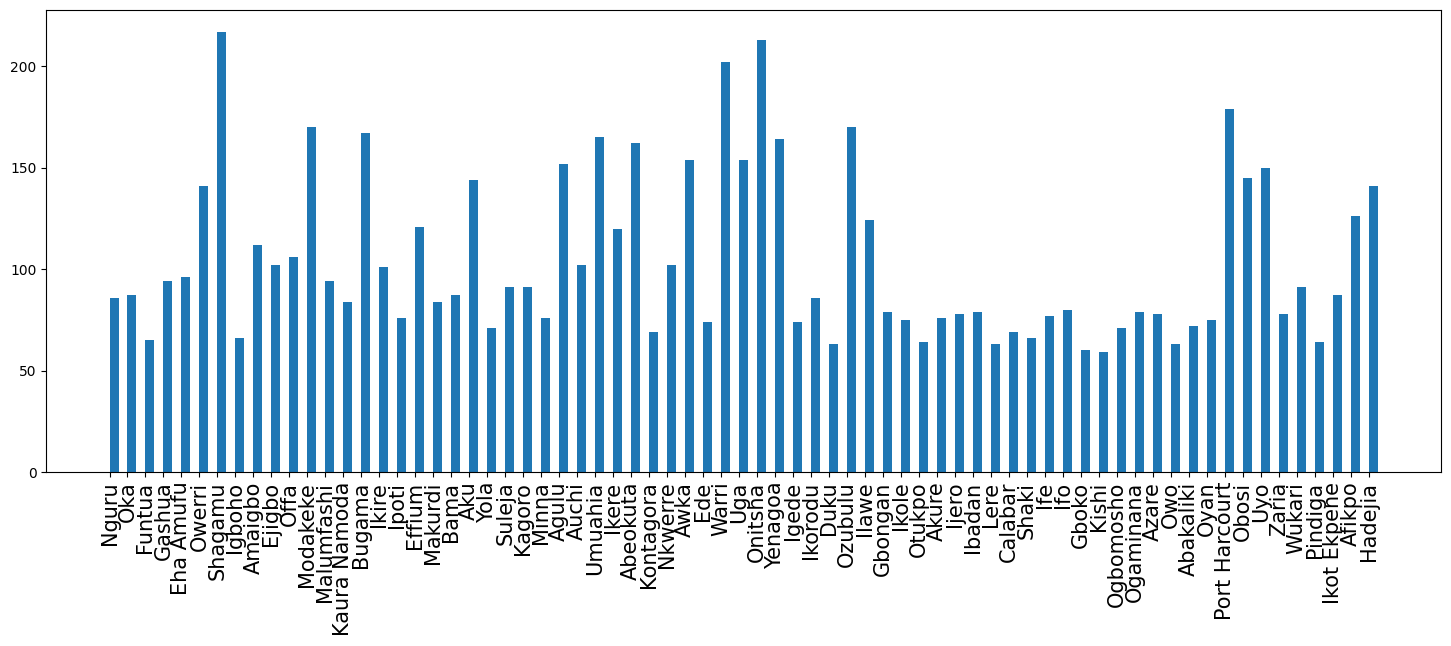

In [11]:
import seaborn as sn 
city = nigeria_data_sample.City.unique()
plt.figure(figsize=(18,6))
plt.bar(city[73:], val[73:], align='edge', width=0.5)
plt.xticks(rotation=90, fontsize=15)
plt.show()

## Data Analysis

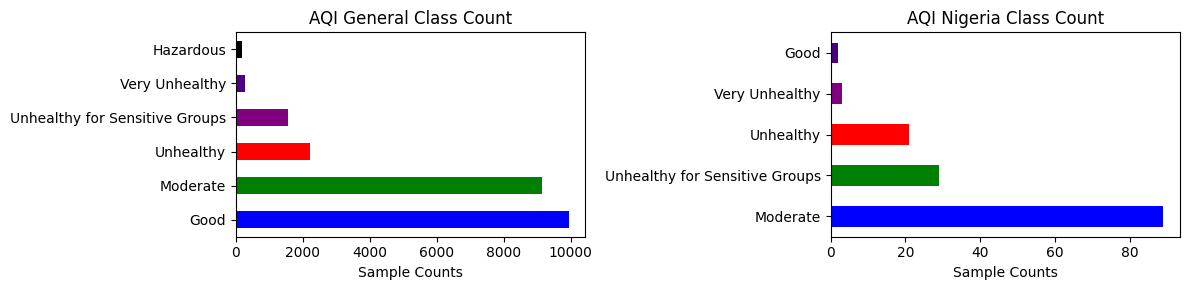

In [12]:
fig, ax = plt.subplots(ncols=2 , figsize=(12, 3))


general_data_sample['AQI Category'].value_counts().plot(kind='barh', ax=ax[0], xlabel='Sample Counts',  color=['blue', 'green', 'red', 'purple', 'indigo', 'black'], title='AQI General Class Count')

nigeria_data_sample['AQI Category'].value_counts().plot(kind='barh', ax=ax[1], xlabel='Sample Counts', color=['blue', 'green', 'red', 'purple', 'indigo', 'black'], title='AQI Nigeria Class Count')
plt.tight_layout()
plt.show()

In [1]:
# # nigeria_data_sample[nigeria_data_sample.City == 'lagos']
# nigeria_data_sample.City.values

## Data Preparation for Training

In [14]:
category_col = [col for col in data.columns if 'Category' in col]
category_col

['AQI Category',
 'CO AQI Category',
 'Ozone AQI Category',
 'NO2 AQI Category',
 'PM2.5 AQI Category']

In [15]:
data[category_col].head(3)

,AQI Category,CO AQI Category,Ozone AQI Category,NO2 AQI Category,PM2.5 AQI Category
0,Moderate,Good,Good,Good,Moderate
1,Good,Good,Good,Good,Good
2,Moderate,Good,Good,Good,Moderate


In [16]:
val_col = [col for col in data.columns if 'Value' in col]
val_col

['AQI Value',
 'CO AQI Value',
 'Ozone AQI Value',
 'NO2 AQI Value',
 'PM2.5 AQI Value']

In [17]:
data[val_col].head(3)

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
0,51,1,36,0,51
1,41,1,5,1,41
2,66,1,39,2,66


DATA SEPARATION (OTEHR COUNTRY AND NIGERIA DATA SMAPLES)

In [18]:
nigeria_sample = data[data['Country'] == 'Nigeria']
general_ample = data[data['Country'] != 'Nigeria']

In [19]:
# for col in category_col
val =  data['AQI Category'].unique().tolist()
label = ['Good', 'Moderate', 'Unhealthy', 'Hazardous']
for idx in range(len(category_col[:])): 
    print('Column : ' , val_col[idx])
    for lb in val:   
        index = data[category_col[idx]][data[category_col[idx]] == lb].index.to_list()
        min = data[val_col[idx]].iloc[index].min()
        max = data[val_col[idx]].iloc[index].max()
        print('Label {}  Min: {}, Max: {} '.format(lb, min, max))
        
        if np.isnan(max):
            pass
            
    print('=======================================')

Column :  AQI Value
Label Moderate  Min: 51, Max: 99 
Label Good  Min: 6, Max: 50 
Label Unhealthy for Sensitive Groups  Min: 100, Max: 149 
Label Unhealthy  Min: 150, Max: 200 
Label Very Unhealthy  Min: 201, Max: 297 
Label Hazardous  Min: 300, Max: 500 
Column :  CO AQI Value
Label Moderate  Min: 51, Max: 67 
Label Good  Min: 0, Max: 49 
Label Unhealthy for Sensitive Groups  Min: 133, Max: 133 
Label Unhealthy  Min: nan, Max: nan 
Label Very Unhealthy  Min: nan, Max: nan 
Label Hazardous  Min: nan, Max: nan 
Column :  Ozone AQI Value
Label Moderate  Min: 51, Max: 99 
Label Good  Min: 0, Max: 50 
Label Unhealthy for Sensitive Groups  Min: 100, Max: 149 
Label Unhealthy  Min: 150, Max: 200 
Label Very Unhealthy  Min: 201, Max: 235 
Label Hazardous  Min: nan, Max: nan 
Column :  NO2 AQI Value
Label Moderate  Min: 51, Max: 91 
Label Good  Min: 0, Max: 49 
Label Unhealthy for Sensitive Groups  Min: nan, Max: nan 
Label Unhealthy  Min: nan, Max: nan 
Label Very Unhealthy  Min: nan, Max: n

REDUCING PREDICTION CLASS TO 4

In [20]:
# converting Unhealthy for Sensitive Groups and Very Unhealthy to UNhealthy
replace_param = {"Unhealthy for Sensitive Groups":"Unhealthy" , "Very Unhealthy":"Unhealthy"}
resample_label = data["AQI Category"]
resample_data = data[category_col].replace(replace_param)

In [21]:
resample_data.sample(7)

,AQI Category,CO AQI Category,Ozone AQI Category,NO2 AQI Category,PM2.5 AQI Category
10442,Moderate,Good,Good,Good,Moderate
6002,Good,Good,Good,Good,Good
19431,Good,Good,Good,Good,Good
4321,Moderate,Good,Moderate,Good,Good
4591,Good,Good,Good,Good,Good
8472,Good,Good,Good,Good,Good
3702,Good,Good,Good,Good,Good


Coverting CAtegorical Value to Code Numbers

In [22]:
resample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   AQI Category        23463 non-null  object
 1   CO AQI Category     23463 non-null  object
 2   Ozone AQI Category  23463 non-null  object
 3   NO2 AQI Category    23463 non-null  object
 4   PM2.5 AQI Category  23463 non-null  object
dtypes: object(5)
memory usage: 916.6+ KB


In [23]:
resample_data = resample_data[category_col].astype('category')
print(resample_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   AQI Category        23463 non-null  category
 1   CO AQI Category     23463 non-null  category
 2   Ozone AQI Category  23463 non-null  category
 3   NO2 AQI Category    23463 non-null  category
 4   PM2.5 AQI Category  23463 non-null  category
dtypes: category(5)
memory usage: 115.5 KB
None


In [24]:
# Encode the Categorical Data to Number Representation
replace_val = {'Good':0, 'Moderate':1, 'Unhealthy':2, 'Hazardous':3}
data = resample_data[category_col].replace(replace_val)

In [25]:
# categorical number representation
data.sample(3)

,AQI Category,CO AQI Category,Ozone AQI Category,NO2 AQI Category,PM2.5 AQI Category
21370,2,0,0,0,2
16515,0,0,0,0,0
5750,1,0,1,0,0


Seperating Nigerial Sample Data from other Data

In [26]:
import pprint
# naigeria sample data index
naija_index = nigeria_sample.index.to_list()
print(naija_index)
print('======================')
print(' EXTRACTED NIGERIA DATA SAMPLES')
print('======================')
nigeria_sample = data.iloc[naija_index]
nigeria_sample.sample(10)

[115, 120, 188, 240, 390, 642, 692, 870, 969, 1119, 1475, 1490, 1493, 1562, 1606, 1647, 1744, 1915, 2430, 2505, 2595, 2690, 2985, 3265, 3386, 3394, 3565, 3889, 3916, 4452, 4555, 4774, 5085, 5196, 5730, 5832, 5852, 6254, 6385, 6603, 6693, 6727, 6767, 7039, 7090, 7491, 7527, 7574, 7656, 7719, 7765, 7770, 7915, 7921, 8071, 8073, 8460, 8724, 9184, 9281, 9416, 9468, 9469, 9617, 9812, 9818, 10580, 10784, 11251, 11307, 11502, 11603, 11829, 12134, 12231, 12503, 12508, 12588, 12647, 13073, 13320, 13812, 14012, 14061, 14090, 14151, 14171, 14677, 14746, 14771, 14793, 14829, 14908, 14962, 14967, 15524, 15580, 15659, 15787, 15865, 15990, 16088, 16108, 16402, 16943, 17365, 17391, 17567, 17578, 17583, 17621, 17911, 17912, 17928, 17952, 18078, 18613, 18701, 18802, 18816, 18831, 19288, 19389, 19865, 20286, 20473, 20474, 20650, 20678, 20701, 20765, 20999, 21024, 21122, 21234, 21336, 21632, 21768, 21969, 22654, 22717, 22811, 22844, 23436]
 EXTRACTED NIGERIA DATA SAMPLES


,AQI Category,CO AQI Category,Ozone AQI Category,NO2 AQI Category,PM2.5 AQI Category
10580,1,0,0,0,1
9281,1,0,0,0,1
11502,1,0,0,0,1
8460,1,0,0,0,1
14151,1,0,0,0,1
2690,1,0,0,0,1
8071,1,0,0,0,1
22811,1,0,0,0,1
7921,1,0,0,0,1
1119,0,0,0,0,0


In [27]:
print('======================')
print('EXTRACT OF OTHER COUNTRIES DATA SAMPLES')
print('======================')
general_index = general_ample.index.to_list()
general_sample = data.iloc[general_index]
general_sample.head()

EXTRACT OF OTHER COUNTRIES DATA SAMPLES


,AQI Category,CO AQI Category,Ozone AQI Category,NO2 AQI Category,PM2.5 AQI Category
0,1,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,1
3,0,0,0,0,0
4,0,0,0,0,0


In [28]:
# RESAMPLE DATA 
general_sample = general_sample.sample(len(general_sample))
# GETTING X AND Y VALUE FOR GENERAL DATA
y_gen = general_sample['AQI Category']
X_gen = general_sample[category_col[1:]]
X_gen.shape, y_gen.shape

((23319, 4), (23319,))

In [29]:
# RESAMPLE DATA 
nigeria_sample = nigeria_sample.sample(len(nigeria_sample))
# GETTING X AND Y VALUE FOR NIGERIA DATA
y_niger = nigeria_sample['AQI Category']
X_niger = nigeria_sample[category_col[1:]]
X_niger.shape, y_niger.shape

((144, 4), (144,))

## MODEL TRAINING 

In [30]:
from sklearn import metrics
import seaborn as sn
label = {'Good':0, 'Moderate':1, 'Unhealthy':2, 'Hazardous':3}

SVM

In [31]:
svm_model = svm.SVC()
svm_model = svm_model.fit(X_gen, y_gen)

svm_train_score = svm_model.score(X_gen, y_gen)
svm_train_score

0.9991852137741756

In [32]:
# Clasification Report of training data
svm_prediction = svm_model.predict(X_gen)
print("SVM CLASSIFIER TRAINING REPORT")
print("==========================================")
print("SVM MODEL Accuracy :  {}".format(metrics.accuracy_score(svm_prediction, y_gen)))
print("SVM MODEL Precision : {} ".format(metrics.precision_score(svm_prediction, y_gen, average='weighted')))
print("SVM MODEL Recall  :   {}".format(metrics.recall_score(svm_prediction, y_gen, average='weighted')))
print("SVM MODEL F1-score  : {}".format(metrics.f1_score(svm_prediction,  y_gen, average='weighted')))

SVM CLASSIFIER TRAINING REPORT
SVM MODEL Accuracy :  0.9991852137741756
SVM MODEL Precision : 0.9992662658071111 
SVM MODEL Recall  :   0.9991852137741756
SVM MODEL F1-score  : 0.999205584472949


NIGERIA SAMPLE DATA TO EVALUATE SVM MODEL

In [33]:
# Clasification Report of training data
svm_predict = svm_model.predict(X_niger)
svm_acc = metrics.accuracy_score(y_niger, svm_predict)
print("Accuracy Score on NIGERIA sample data  :", svm_acc)

Accuracy Score on NIGERIA sample data  : 1.0


<Axes: >

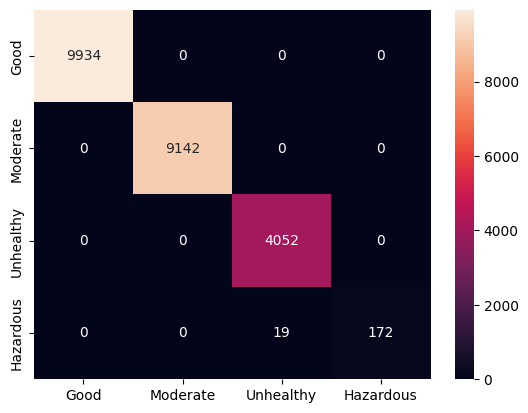

In [36]:
svm_con = metrics.confusion_matrix(y_gen, svm_prediction)
sn.heatmap(svm_con, fmt='d' , annot=True, xticklabels=list(label.keys()), yticklabels=list(label.keys()))

## GRADIENT BOOST MODEL

In [37]:
gbclassifier = GradientBoostingClassifier()
gbc_model = gbclassifier.fit(X_gen, y_gen)
gbc_model.score(X_gen, y_gen)

0.9991852137741756

In [38]:
gbc_predictions = gbc_model.predict(X_gen)
print("GRADIENT BOOST CLASSIFIER TRAINING REPORT")
print("==========================================")
print("GBC MODEL Accuracy :  {}".format(metrics.accuracy_score(gbc_predictions, y_gen)))
print("GBC MODEL Precision : {} ".format(metrics.precision_score(gbc_predictions, y_gen, average='weighted')))
print("GBC MODEL Recall  :   {}".format(metrics.recall_score(gbc_predictions, y_gen, average='weighted')))
print("GBC MODEL F1-score  : {}".format(metrics.f1_score(gbc_predictions, y_gen, average='weighted')))

GRADIENT BOOST CLASSIFIER TRAINING REPORT
GBC MODEL Accuracy :  0.9991852137741756
GBC MODEL Precision : 0.9992662658071111 
GBC MODEL Recall  :   0.9991852137741756
GBC MODEL F1-score  : 0.999205584472949


In [39]:
# NIGERIA SAMPLE DATA TO EVALUATE GBC MODEL
# Clasification Report of training data
gbc_predict = gbc_model.predict(X_niger)
gbc_acc = metrics.accuracy_score(y_niger, gbc_predict)
print("Accuracy Score on NIGERIA sample data  :", gbc_acc)

Accuracy Score on NIGERIA sample data  : 1.0


<Axes: >

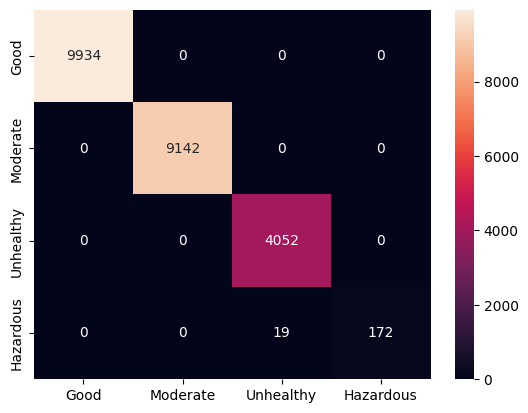

In [40]:
gbc_con = metrics.confusion_matrix(y_gen, gbc_predictions)
sn.heatmap(gbc_con, fmt='d' , annot=True, xticklabels=list(label.keys()), yticklabels=list(label.keys()))

## RANDOM FOREST CLASSIFICATION

In [41]:
rfclassifier = RandomForestClassifier()
rf_model = rfclassifier.fit(X_gen, y_gen)
rf_model.score(X_gen, y_gen)

0.9991852137741756

In [42]:
rf_predictions = rf_model.predict(X_gen)
print("RANDOM FOREST CLASSIFIER TRAINING REPORT")
print("==========================================")
print("RF MODEL Accuracy :  {}".format(metrics.accuracy_score(rf_predictions, y_gen, average='weighted')))
print("RF MODEL Precision : {} ".format(metrics.precision_score(rf_predictions, y_gen, average='weighted')))
print("RF MODEL Recall  :   {}".format(metrics.recall_score(rf_predictions, y_gen, average='weighted')))
print("RF MODEL F1-score  : {}".format(metrics.f1_score(rf_predictions, y_gen, average='weighted')))

RANDOM FOREST CLASSIFIER TRAINING REPORT
RF MODEL Accuracy :  0.9991852137741756
RF MODEL Precision : 0.9992662658071111 
RF MODEL Recall  :   0.9991852137741756
RF MODEL F1-score  : 0.999205584472949


In [43]:
# NIGERIA SAMPLE DATA TO EVALUATE GBC MODEL
# Clasification Report of training data
rf_predict = rf_model.predict(X_niger)
rf_acc = metrics.accuracy_score(y_niger, rf_predict)
print("Accuracy Score on NIGERIA sample data  :", rf_acc)

Accuracy Score on NIGERIA sample data  : 1.0


<Axes: >

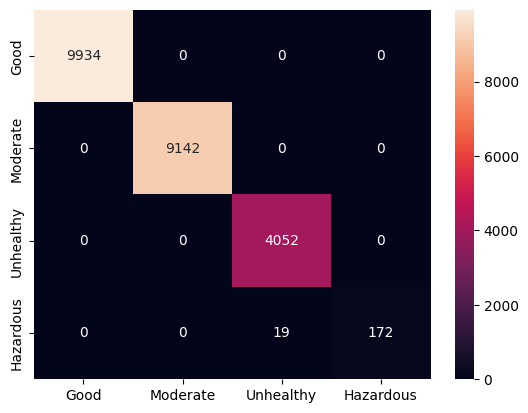

In [44]:
rf_con = metrics.confusion_matrix(y_gen, rf_predictions)
sn.heatmap(rf_con, fmt='d' , annot=True, xticklabels=list(label.keys()), yticklabels=list(label.keys()))

## KNN MODEL 

In [45]:
knn_classifier = KNeighborsRegressor()
knn_model = knn_classifier.fit(X_gen, y_gen)
knn_model.score(X_gen, y_gen)

0.9984835841924864

In [46]:
knn_predictions = knn_model.predict(X_gen)
knn_predictions = knn_predictions.astype(np.int32)

In [47]:
print("KNN CLASSIFIER TRAINING REPORT")
print("==========================================")
print("KNN MODEL Accuracy :  {}".format(metrics.accuracy_score(knn_predictions, y_gen,)))
print("KNN MODEL Precision : {} ".format(metrics.precision_score(knn_predictions, y_gen, average='weighted')))
print("KNN MODEL Recall  :   {}".format(metrics.recall_score(knn_predictions, y_gen, average='weighted')))
print("KNN MODEL F1-score  : {}".format(metrics.f1_score(knn_predictions, y_gen, average='weighted')))

KNN CLASSIFIER TRAINING REPORT
KNN MODEL Accuracy :  0.9990136798318967
KNN MODEL Precision : 0.9991221256823941 
KNN MODEL Recall  :   0.9990136798318967
KNN MODEL F1-score  : 0.9990412312620817


In [48]:
# NIGERIA SAMPLE DATA TO EVALUATE GBC MODEL
# Clasification Report of training data
knn_predict = knn_model.predict(X_niger)
knn_acc = metrics.accuracy_score(y_niger, knn_predict)
print("Accuracy Score on NIGERIA sample data  :", knn_acc)

Accuracy Score on NIGERIA sample data  : 1.0


<Axes: >

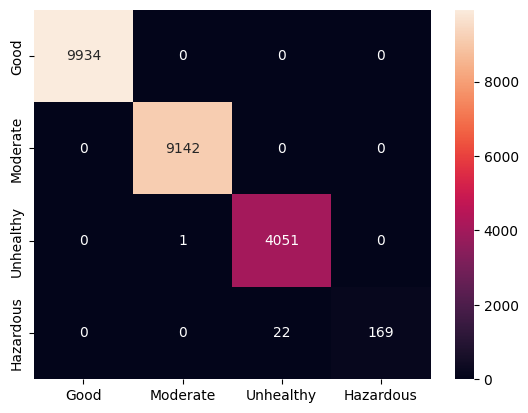

In [49]:
knn_con = metrics.confusion_matrix(y_gen, knn_predictions)
sn.heatmap(knn_con, fmt='d' , annot=True, xticklabels=list(label.keys()), yticklabels=list(label.keys()))

## ANN

In [51]:
import tensorflow as tf

data_size = len(X_gen.columns)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(data_size, )), 
    tf.keras.layers.Dense(500 , activation='relu'), 
    tf.keras.layers.Dense(200 , activation='relu'),
    tf.keras.layers.Dense(100 , activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
    ])

model.compile(
        loss='sparse_categorical_crossentropy', 
        optimizer='Adam',
        metrics=['Accuracy']
    )

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               2500      
                                                                 
 dense_1 (Dense)             (None, 200)               100200    
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 4)                 404       
                                                                 
Total params: 123,204
Trainable params: 123,204
Non-trainable params: 0
_________________________________________________________________


In [52]:
training_history = model.fit(X_gen, y_gen, validation_data=(X_niger, y_niger), epochs=2)

Epoch 1/10
729/729 [==============================] - 5s 5ms/step - loss: 0.0879 - Accuracy: 0.9713 - val_loss: 3.8614e-04 - val_Accuracy: 1.0000
Epoch 2/10
729/729 [==============================] - 3s 5ms/step - loss: 0.0067 - Accuracy: 0.9991 - val_loss: 0.0011 - val_Accuracy: 1.0000
Epoch 3/10
729/729 [==============================] - 4s 5ms/step - loss: 0.0067 - Accuracy: 0.9991 - val_loss: 0.0218 - val_Accuracy: 1.0000
Epoch 4/10
729/729 [==============================] - 4s 5ms/step - loss: 0.0060 - Accuracy: 0.9991 - val_loss: 8.1409e-04 - val_Accuracy: 1.0000
Epoch 5/10
729/729 [==============================] - 3s 5ms/step - loss: 0.0056 - Accuracy: 0.9992 - val_loss: 2.5207e-04 - val_Accuracy: 1.0000
Epoch 6/10
729/729 [==============================] - 4s 5ms/step - loss: 0.0058 - Accuracy: 0.9992 - val_loss: 0.0035 - val_Accuracy: 1.0000
Epoch 7/10
729/729 [==============================] - 4s 5ms/step - loss: 0.0060 - Accuracy: 0.9990 - val_loss: 4.0814e-04 - val_Accurac

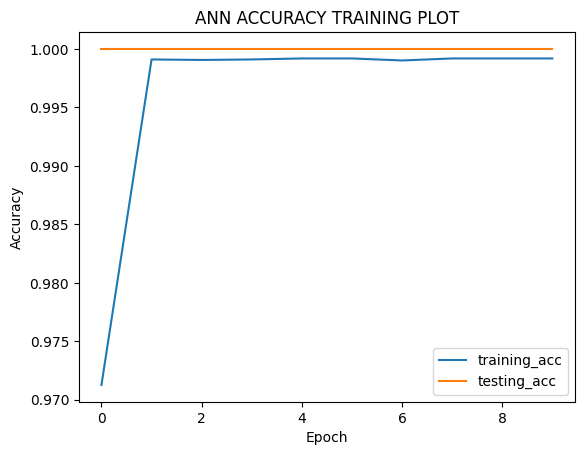

In [53]:
ann_training_acc = training_history.history['Accuracy']
ann_testing_accc = training_history.history['val_Accuracy']
ann_training_loss = training_history.history['loss']
ann_testing_loss = training_history.history['val_loss']

plt.plot(ann_training_acc, label='training_acc')
plt.plot(ann_testing_accc, label='testing_acc')
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.title("ANN ACCURACY TRAINING PLOT")
plt.legend()
plt.show()

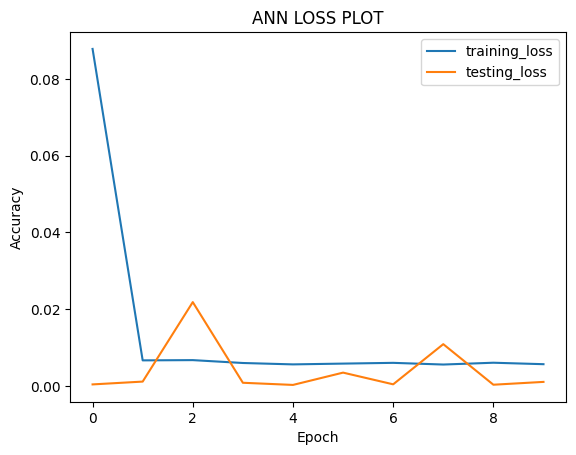

In [54]:
plt.plot(ann_training_loss, label='training_loss')
plt.plot(ann_testing_loss, label='testing_loss')
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.title("ANN LOSS PLOT")
plt.legend()
plt.show()

In [55]:
predict = model.predict(X_gen)
predict = [np.argmax(pre) for pre in predict]
print("ANN CLASSIFIER TRAINING REPORT")
print("==========================================")
print("ANN MODEL Accuracy :  {}".format(metrics.accuracy_score(predict, y_gen,)))
print("ANN MODEL Precision : {} ".format(metrics.precision_score(predict, y_gen, average='weighted')))
print("ANN MODEL Recall  :   {}".format(metrics.recall_score(predict, y_gen, average='weighted')))
print("ANN MODEL F1-score  : {}".format(metrics.f1_score(predict, y_gen, average='weighted')))

729/729 [==============================] - 3s 4ms/step
ANN CLASSIFIER TRAINING REPORT
ANN MODEL Accuracy :  0.9991852137741756
ANN MODEL Precision : 0.9992662658071111 
ANN MODEL Recall  :   0.9991852137741756
ANN MODEL F1-score  : 0.999205584472949


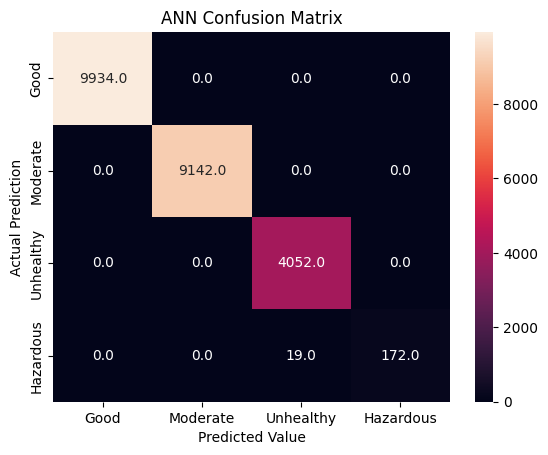

In [58]:
ann_confu = metrics.confusion_matrix(y_gen, predict)
sn.heatmap(ann_confu, fmt='.1f' , annot=True, xticklabels=label, yticklabels=label)
plt.ylabel("Actual Prediction")
plt.xlabel("Predicted Value")
plt.title('ANN Confusion Matrix')
plt.show()

## Ensemble Model

In [63]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


knn = KNeighborsClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
ann = MLPClassifier()



models = [('knn', knn), ('ann', ann) , ('rf', rf), ('gb', gb)]

# constructing the assemble model
ensemble_model =  VotingClassifier(
estimators=models , voting='soft')

# training the ensemple model
ensemble_model.fit(X_gen, y_gen)

VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('ann', MLPClassifier()),
                             ('rf', RandomForestClassifier()),
                             ('gb', GradientBoostingClassifier())],
                 voting='soft')

In [64]:
ensemble_model.score(X_gen, y_gen)

0.9991852137741756

In [65]:
# naigerial data sample
ensemble_model.score(X_niger, y_niger)

1.0

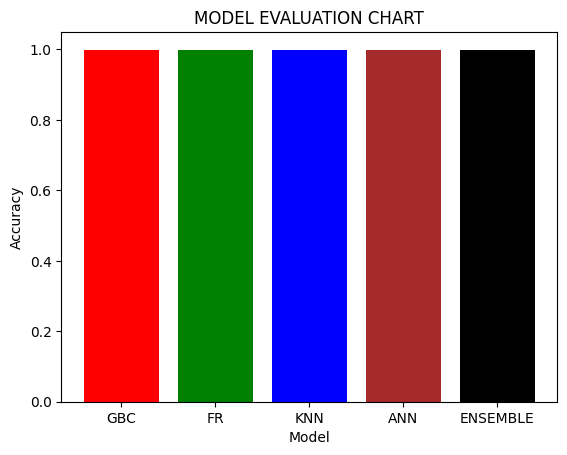

In [103]:
model_accuracy = [0.9991852137741756, 0.9991852137741756, 0.9984835841924864 , 0.9991852137741756,0.9991852137741756]
model_name = ['GBC', 'FR', 'KNN', 'ANN', 'ENSEMBLE']

plt.bar(model_name,  model_accuracy, color=['red', 'green', 'blue', 'brown', 'black'])
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.title("MODEL EVALUATION CHART")
plt.show()